In [1]:
%pylab inline
%matplotlib inline
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['/Users/Argen/Documents/MAS/R&D/Code/pgm'])

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

import networkx as nx

from pgm.nodes.chance import Chance
from pgm.nodes.decision import Decision
from pgm.nodes.utility import Utility

Populating the interactive namespace from numpy and matplotlib
Python 2.7.10 |Anaconda 2.3.0 (x86_64)| (default, May 28 2015, 17:04:42) 
[GCC 4.2.1 (Apple Inc. build 5577)] on darwin


In [2]:
def node_types(graph):
    chance = []
    decision = []
    utility = []
    
    for n in graph:
        if graph.node[n]['type'] == 'chance':
            chance.append(n)
        elif graph.node[n]['type'] == 'decision':
            decision.append(n)
        elif graph.node[n]['type'] == 'utility':
            utility.append(n)
    
    nodes = {'chance':chance, 'decision':decision, 'utility':utility}
    
    return nodes

In [3]:
def draw_graph(graph, pos=None, size=600, alpha=0.9, show=False, save=False):
    # 's' = square
    # 'D' = diamond
    # 'o' = circle

    title = graph.graph['title']

    plt.figure()
    plt.axis('off')

    if pos==None:
        p = nx.graphviz_layout(graph, prog='dot')
    else:
        p=pos

    node_dict = node_types(graph)
    chance, decision, utility = node_dict.get('chance'), node_dict.get('decision'), node_dict.get('utility')
    # print len(chance), len(decision), len(utility)
    
        
    if len(chance) > 0:
        nx.draw_networkx_nodes(graph, p, nodelist=chance, node_size=size, node_shape='o', alpha=alpha, node_color='w')
    if len(decision) > 0:
        nx.draw_networkx_nodes(graph, p, nodelist=decision, node_size=size, node_shape='s',alpha=alpha, node_color='g')
    if len(utility) > 0:
        nx.draw_networkx_nodes(graph, p, nodelist=utility, node_size=size, node_shape='D', alpha=alpha, node_color='r')

    nx.draw_networkx_edges(graph, pos=p)
    nx.draw_networkx_labels(graph, pos=p)

    if save:
        nx.write_dot(graph, title + '.dot')
        plt.savefig(title + '.png')

    if show:
        plt.show()

In [4]:
nodes = [('A', {'domain': ['T', 'F'], 'type': 'chance'}), ('B', {'domain': ['T', 'F'], 'type': 'chance'}), 
         ('C', {'domain': ['T', 'F'], 'type': 'chance'}), ('D', {'domain': ['T', 'F'], 'type': 'chance'}), 
         ('E', {'domain': ['T', 'F'], 'type': 'chance'}), ('F', {'domain': ['T', 'F'], 'type': 'chance'}), 
         ('G', {'domain': ['T', 'F'], 'type': 'chance'}), ('H', {'domain': ['T', 'F'], 'type': 'chance'}), 
         ('I', {'domain': ['T', 'F'], 'type': 'chance'}), ('J', {'domain': ['T', 'F'], 'type': 'chance'}), 
         ('K', {'domain': ['T', 'F'], 'type': 'chance'}), ('L', {'domain': ['T', 'F'], 'type': 'chance'}), 
         ('D1', {'domain': ['d1', 'd2'], 'type': 'decision'}), ('D2', {'domain': ['d1', 'd2'], 'type': 'decision'}), 
         ('D3', {'domain': ['d1', 'd2'], 'type': 'decision'}), ('D4', {'domain': ['d1', 'd2'], 'type': 'decision'}), 
         ('V1', {'type': 'utility'}), ('V2', {'type': 'utility'}), ('V3', {'type': 'utility'}), ('V4', {'type': 'utility'})]

edges = [('A', 'C'), ('B', 'C'), ('B', 'D1'), ('B', 'D'), ('D1', 'V1'), ('D1', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'), 
         ('E', 'G'), ('E', 'D2'), ('F', 'D2'), ('F', 'H'), ('G', 'D4'), ('G', 'I'), ('D2', 'I'), ('D2', 'D3'), ('H', 'K'), 
         ('H', 'J'), ('D3', 'K'), ('D3', 'V2'), ('D3', 'D4'), ('D4', 'L'), ('I', 'L'), ('J', 'V3'), ('K', 'V3'), ('L', 'V4')]

In [5]:
net = nx.DiGraph(title='influence_diagram')

net.add_nodes_from(nodes)
net.add_edges_from(edges)

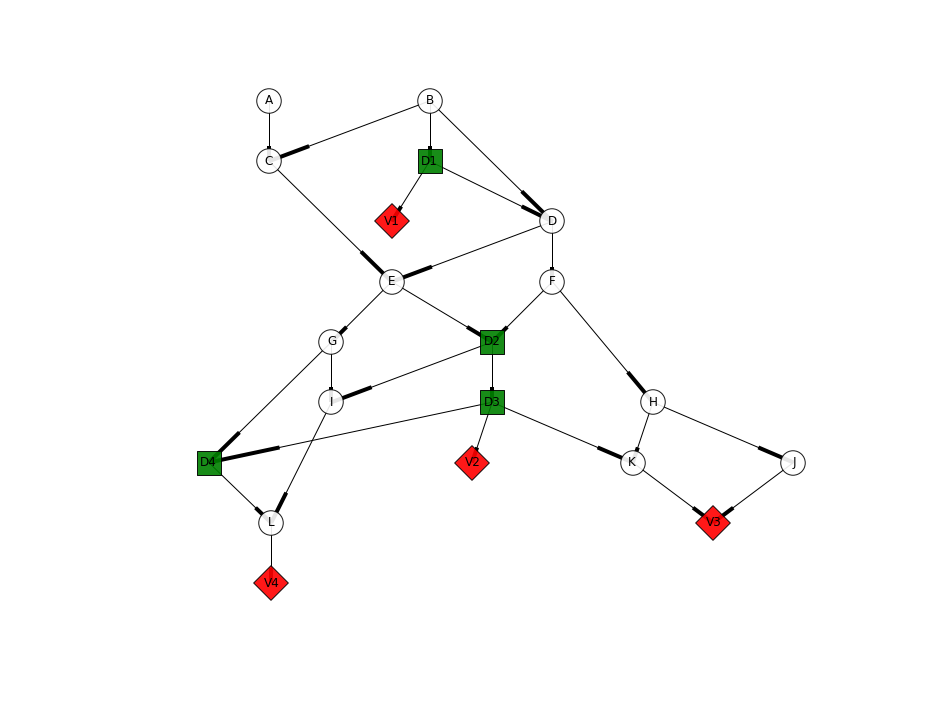

In [6]:
pos = nx.graphviz_layout(net, prog='dot')
draw_graph(net, pos)

### Moral Graph
1. Remove information links
2. Add moral links
3. Convert to undirected graph
4. Remove utility nodes

In [7]:
G = net.copy()
G.graph['title']= 'moral_steps'

In [8]:
node_dict = node_types(net)
chance, decision, utility = node_dict.get('chance'), node_dict.get('decision'), node_dict.get('utility')

Total: 21 
Edges: [('A', 'C'), ('C', 'E'), ('B', 'C'), ('B', 'D'), ('E', 'G'), ('D', 'E'), ('D', 'F'), ('G', 'I'), ('F', 'H'), ('I', 'L'), ('H', 'K'), ('H', 'J'), ('K', 'V3'), ('J', 'V3'), ('L', 'V4'), ('D4', 'L'), ('D2', 'I'), ('D3', 'K'), ('D3', 'V2'), ('D1', 'V1'), ('D1', 'D')]


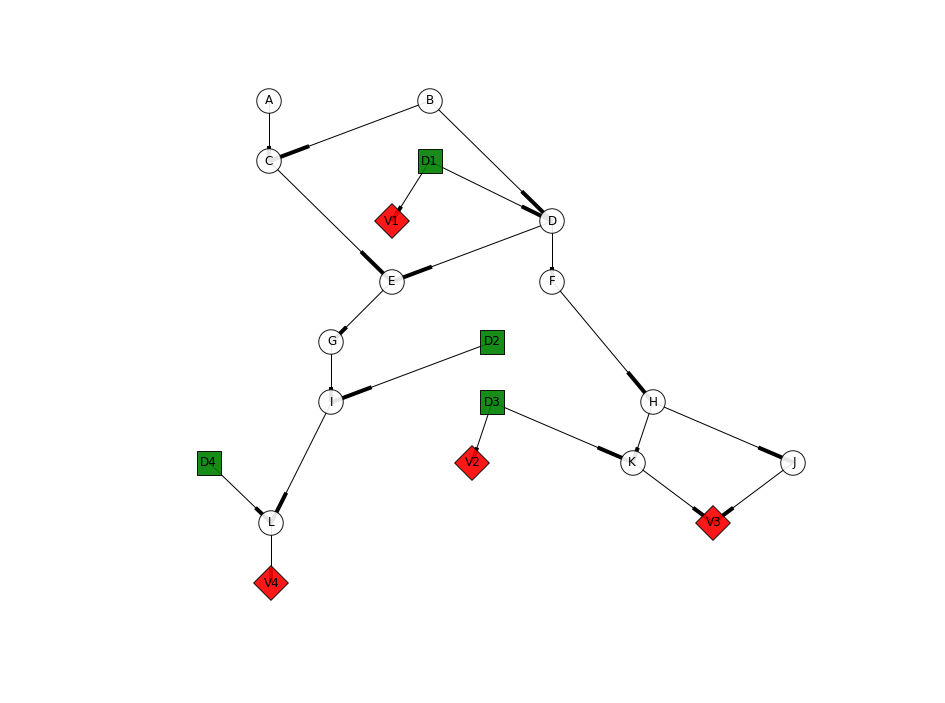

In [9]:
# Remove information links
for n in decision:
    for p in net.predecessors(n):
        G.remove_edge(p, n)
        
print 'Total: %s \nEdges: %s'%(len(G.edges()),G.edges())
draw_graph(G, pos)

('B', 'D1')  exists
[('A', 'B'), ('C', 'D'), ('B', 'D1'), ('D2', 'G'), ('H', 'D3'), ('I', 'D4'), ('K', 'J')]
7
Total: 28 
Edges: [('A', 'C'), ('A', 'B'), ('C', 'E'), ('C', 'D'), ('B', 'C'), ('B', 'D'), ('B', 'D1'), ('E', 'G'), ('D', 'E'), ('D', 'F'), ('G', 'I'), ('F', 'H'), ('I', 'D4'), ('I', 'L'), ('H', 'K'), ('H', 'J'), ('H', 'D3'), ('K', 'J'), ('K', 'V3'), ('J', 'V3'), ('L', 'V4'), ('D4', 'L'), ('D2', 'I'), ('D2', 'G'), ('D3', 'K'), ('D3', 'V2'), ('D1', 'V1'), ('D1', 'D')]


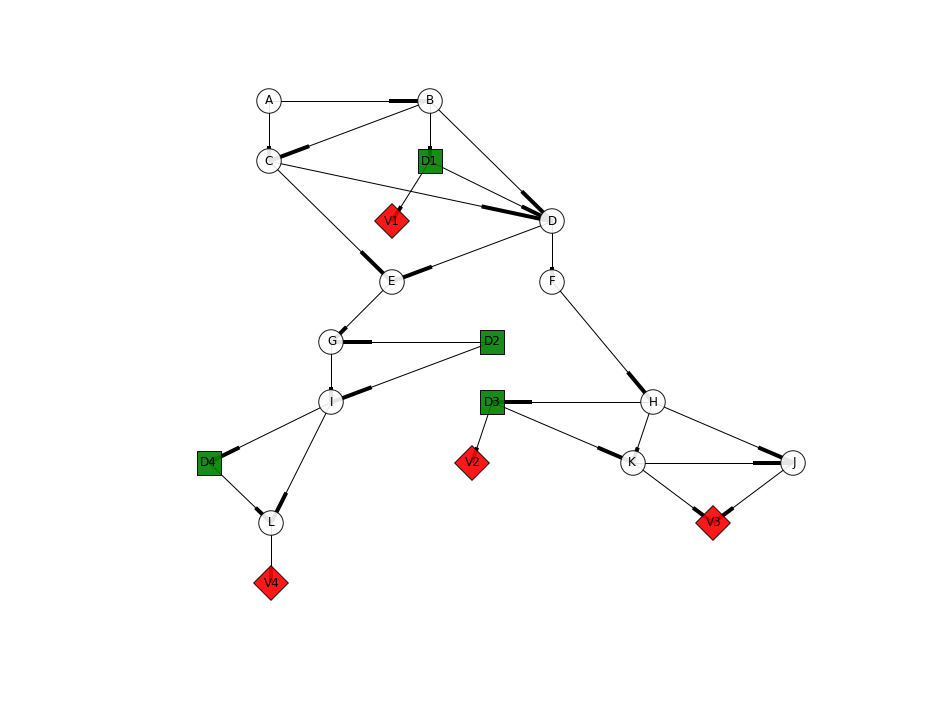

In [10]:
# Add moral links
moral_edges = []
for n in net.nodes_iter():
    arcs = list(combinations(G.predecessors(n), 2))
    for a in arcs:
        if a in net.edges():
            moral_edges.append(a)
            print a, ' exists'
        elif a[::-1] in net.edges():
            moral_edges.append(a[::-1])
            print a, ' exists'
        else:
            moral_edges.append(a)
        # print moral_edges
    
print moral_edges
print len(moral_edges)

G.add_edges_from(moral_edges)
print 'Total: %s \nEdges: %s'%(len(G.edges()),G.edges())
draw_graph(G, pos)

['A', 'C', 'B', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'J', 'L', 'V1', 'V2', 'V3', 'V4', 'D4', 'D2', 'D3', 'D1']
Total: 28 
Edges: [('A', 'C'), ('A', 'B'), ('C', 'B'), ('C', 'E'), ('C', 'D'), ('B', 'D'), ('B', 'D1'), ('E', 'D'), ('E', 'G'), ('D', 'D1'), ('D', 'F'), ('G', 'I'), ('G', 'D2'), ('F', 'H'), ('I', 'D4'), ('I', 'D2'), ('I', 'L'), ('H', 'K'), ('H', 'J'), ('H', 'D3'), ('K', 'J'), ('K', 'V3'), ('K', 'D3'), ('J', 'V3'), ('L', 'D4'), ('L', 'V4'), ('V1', 'D1'), ('V2', 'D3')]


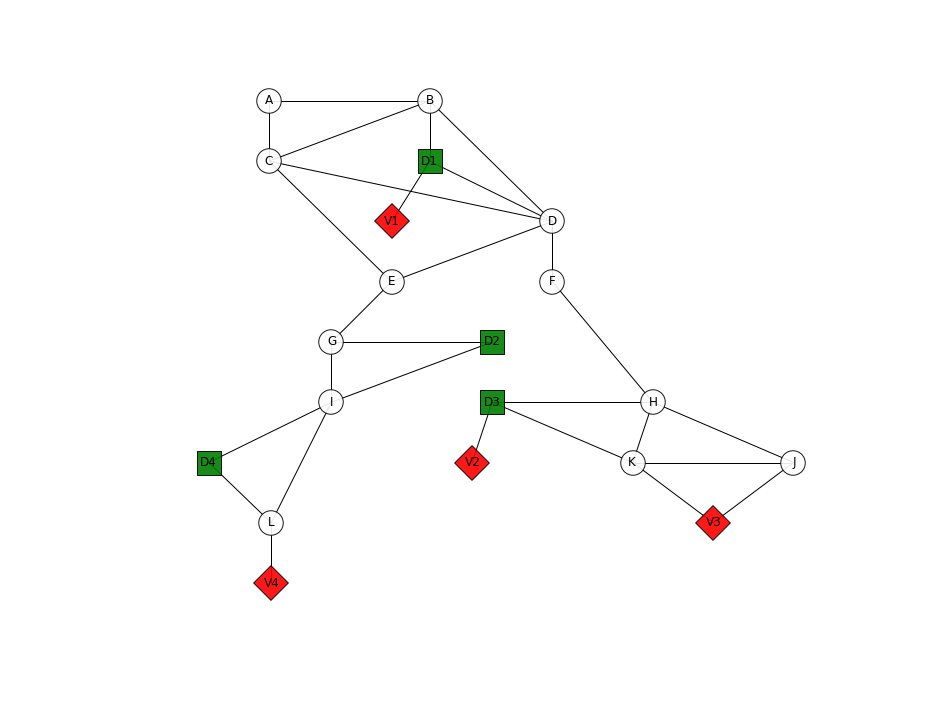

In [11]:
# Convert to undirected graph
moral_graph = nx.Graph(title='moral_graph')
moral_graph = G.to_undirected()
moral_graph.graph['title']='moral_graph'

print moral_graph.nodes()
print 'Total: %s \nEdges: %s'%(len(moral_graph.edges()),moral_graph.edges())
draw_graph(moral_graph, pos)
# print self.ugraph.node

['A', 'C', 'B', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'J', 'L', 'D4', 'D2', 'D3', 'D1']
Total: 23 
Edges: [('A', 'C'), ('A', 'B'), ('C', 'B'), ('C', 'E'), ('C', 'D'), ('B', 'D'), ('B', 'D1'), ('E', 'D'), ('E', 'G'), ('D', 'D1'), ('D', 'F'), ('G', 'I'), ('G', 'D2'), ('F', 'H'), ('I', 'D4'), ('I', 'D2'), ('I', 'L'), ('H', 'K'), ('H', 'J'), ('H', 'D3'), ('K', 'J'), ('K', 'D3'), ('L', 'D4')]


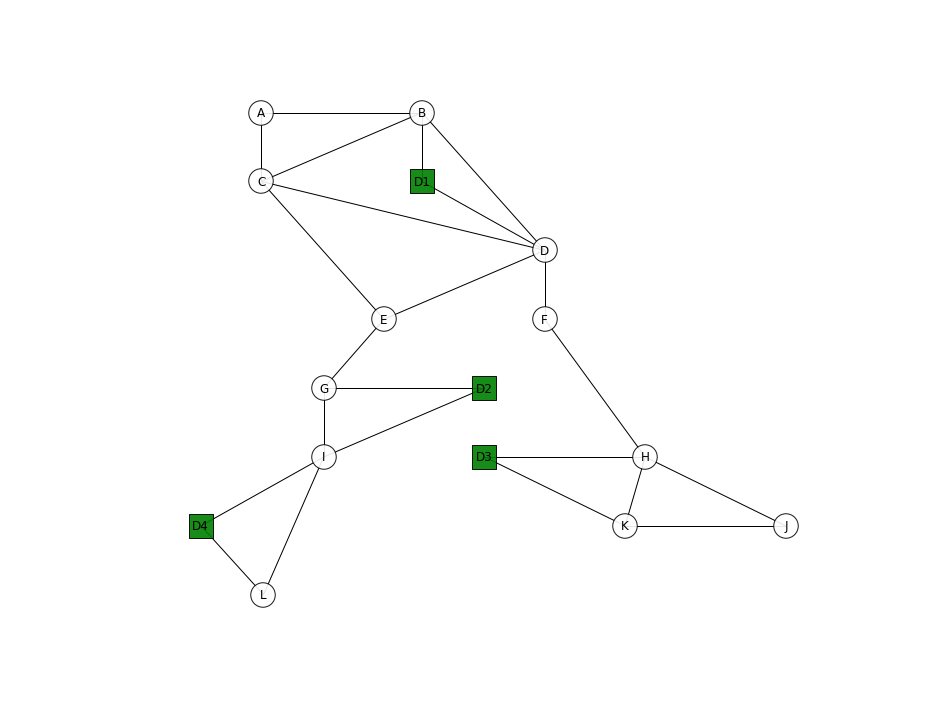

In [12]:
# Remove utility nodes
moral_graph.remove_nodes_from(utility)
print moral_graph.nodes()
print 'Total: %s \nEdges: %s'%(len(moral_graph.edges()),moral_graph.edges())
draw_graph(moral_graph, pos)

In [13]:
cliq = list(nx.find_cliques(moral_graph))
print cliq

[['A', 'C', 'B'], ['D', 'C', 'B'], ['D', 'C', 'E'], ['D', 'F'], ['D', 'D1', 'B'], ['G', 'I', 'D2'], ['G', 'E'], ['I', 'D4', 'L'], ['H', 'K', 'J'], ['H', 'K', 'D3'], ['H', 'F']]


In [14]:
print moral_graph.nodes(data=True)
print moral_graph.edges()

[('A', {'domain': ['T', 'F'], 'type': 'chance'}), ('C', {'domain': ['T', 'F'], 'type': 'chance'}), ('B', {'domain': ['T', 'F'], 'type': 'chance'}), ('E', {'domain': ['T', 'F'], 'type': 'chance'}), ('D', {'domain': ['T', 'F'], 'type': 'chance'}), ('G', {'domain': ['T', 'F'], 'type': 'chance'}), ('F', {'domain': ['T', 'F'], 'type': 'chance'}), ('I', {'domain': ['T', 'F'], 'type': 'chance'}), ('H', {'domain': ['T', 'F'], 'type': 'chance'}), ('K', {'domain': ['T', 'F'], 'type': 'chance'}), ('J', {'domain': ['T', 'F'], 'type': 'chance'}), ('L', {'domain': ['T', 'F'], 'type': 'chance'}), ('D4', {'domain': ['d1', 'd2'], 'type': 'decision'}), ('D2', {'domain': ['d1', 'd2'], 'type': 'decision'}), ('D3', {'domain': ['d1', 'd2'], 'type': 'decision'}), ('D1', {'domain': ['d1', 'd2'], 'type': 'decision'})]
[('A', 'C'), ('A', 'B'), ('C', 'B'), ('C', 'E'), ('C', 'D'), ('B', 'D'), ('B', 'D1'), ('E', 'D'), ('E', 'G'), ('D', 'D1'), ('D', 'F'), ('G', 'I'), ('G', 'D2'), ('F', 'H'), ('I', 'D4'), ('I', 'D2'